In [ ]:
# Importing libraries
ißmport numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris() #dict
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head() # first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


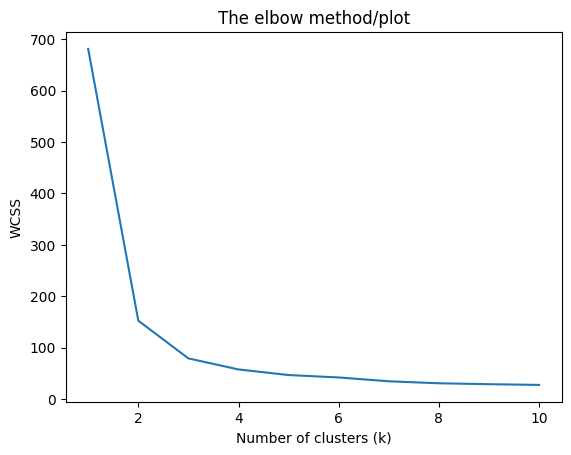

In [ ]:

x = iris_df.iloc[:,[0,1,2,3]].values # loc

# Import our kmeans algorithm
from sklearn.cluster import KMeans

# WCSS - Plot the elbow plot
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(x) # train the algorithm with the input data (x)
  wcss.append(kmeans.inertia_) # WCSS is also called inertia

# Plot the results on a line chart
# Allow us to observe the elbow
plt.plot(range(1,11), wcss)
plt.title('The elbow method/plot')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans_model = kmeans.fit(x) # Training the model on input data

y_kmeans = kmeans_model.predict(x)

x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

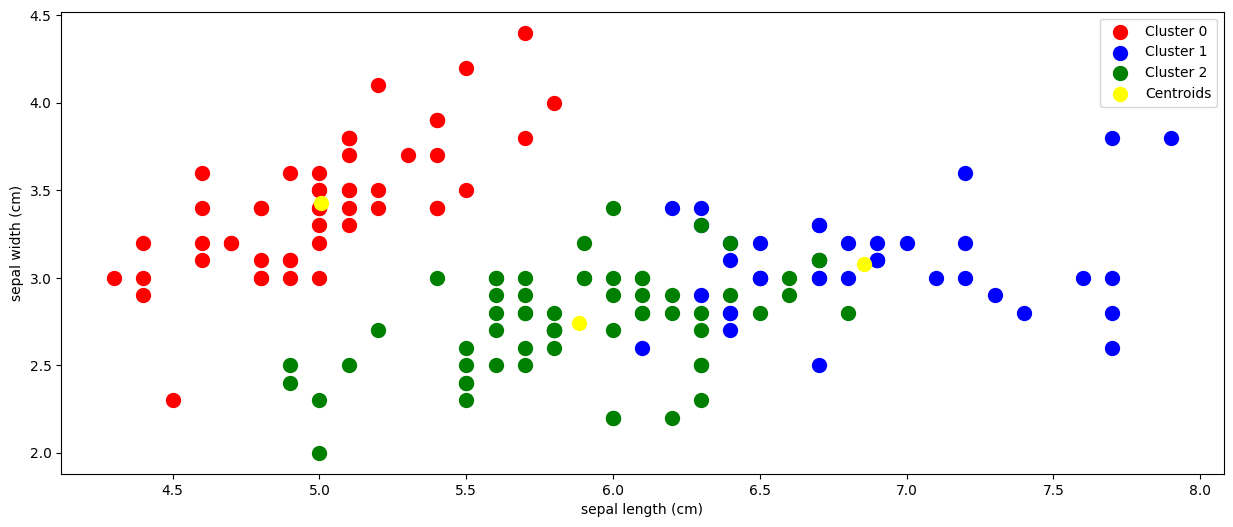

In [ ]:
plt.figure(figsize=(15,6))

# Plot scatter plots
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1],
  s=100, c='red', label='Cluster 0')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1],
  s=100, c='blue', label='Cluster 1')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1],
  s=100, c='green', label='Cluster 2')

# Cluster centroids
plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1],
  s=100, c='yellow', label='Centroids')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.show()

In [ ]:
kmeans_model.predict([[1.2,3.4,5.5,6.7]])[0]

2

In [ ]:
from numpy import random, array

def createClusteredData(N, k):
  random.seed(10)
  pointsPerCluster = float(N)/k
  X = []
  for i in range(k):
    incomeCentroid = random.uniform(20000.0, 20000.0)
    ageCentroid = random.uniform(20.0, 70.0)
    for j in range(int(pointsPerCluster)):
      X.append([random.normal(incomeCentroid, 10000.0), random.normal(ageCentroid, 2.0)])
  X = array(X)
  return X

[3 0 2 2 2 2 0 2 0 3 0 2 3 2 2 2 2 3 2 3 4 4 4 1 4 4 1 1 4 4 1 4 1 4 1 4 1
 4 4 1 2 2 2 3 2 3 0 3 2 0 2 2 3 2 3 2 0 2 0 3 1 1 1 4 4 4 1 1 4 4 1 4 1 1
 1 4 4 1 1 1 0 2 0 3 0 3 3 0 3 3 2 0 2 0 0 3 3 2 0 0]


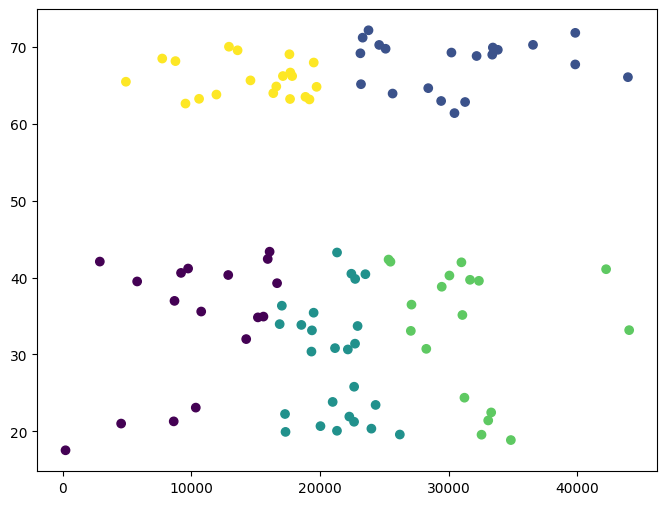

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from numpy import random, float128
import numpy as np

data = createClusteredData(100, 5)
model = KMeans(n_clusters=5)
model = model.fit(scale(data))

print(model.labels_)

plt.figure(figsize=(8,6))
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(np.float128))
plt.show()

[1 2 3 3 0 3 2 3 2 1 2 3 1 3 0 0 3 1 3 1 2 2 0 3 0 0 1 4 0 0 1 0 1 0 3 0 3
 2 2 4 0 0 3 1 0 3 0 1 3 2 0 0 3 3 4 0 0 3 0 1 1 1 1 0 0 2 1 4 0 0 3 2 3 3
 1 0 0 1 1 3 0 3 2 1 0 3 1 2 3 4 3 0 3 2 0 1 1 3 2 2]


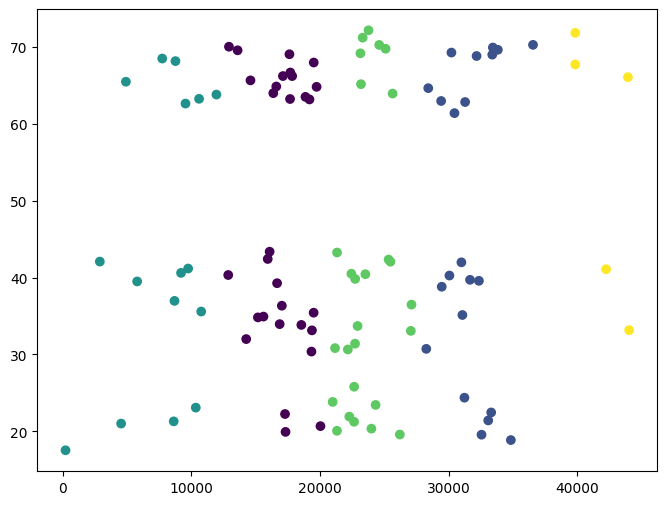

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from numpy import random, float128
import numpy as np

data = createClusteredData(100, 5)
model = KMeans(n_clusters=5)
model = model.fit(data)

print(model.labels_)

plt.figure(figsize=(8,6))
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(np.float128))
plt.show()

[3 0 2 2 2 2 0 2 0 3 0 2 3 2 2 2 2 3 2 3 4 4 4 1 4 4 1 1 4 4 1 4 1 4 1 4 1
 4 4 1 2 2 2 3 2 3 0 3 2 0 2 2 3 2 3 2 0 2 0 3 1 1 1 4 4 4 1 1 4 4 1 4 1 1
 1 4 4 1 1 1 0 2 0 3 0 3 3 0 3 3 2 0 2 0 0 3 3 2 0 0]


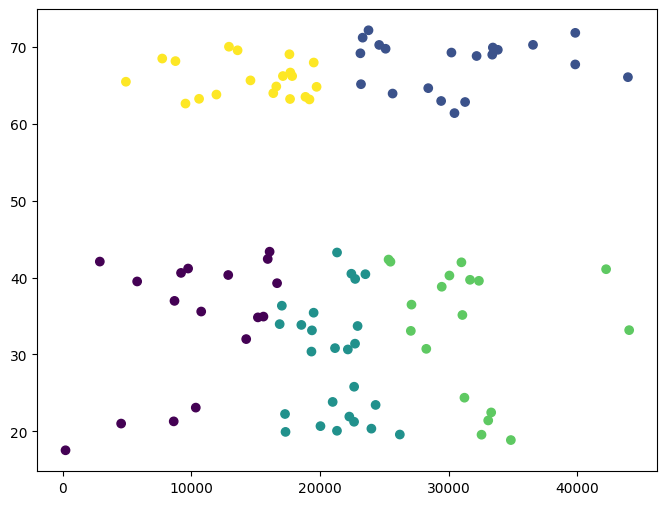

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from numpy import random, float128
import numpy as np

data = createClusteredData(100, 5)
model = KMeans(n_clusters=5)
model = model.fit(scale(data))

print(model.labels_)

plt.figure(figsize=(8,6))
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(np.float128))
plt.show()

In [ ]:
model.predict([[30000, 20]])[0]

3